Observed y at x=3: 1.3
LWR Predicted y at x=3: 2.105
Locally weighted regression coefficients: Intercept=0.275, Slope=0.610


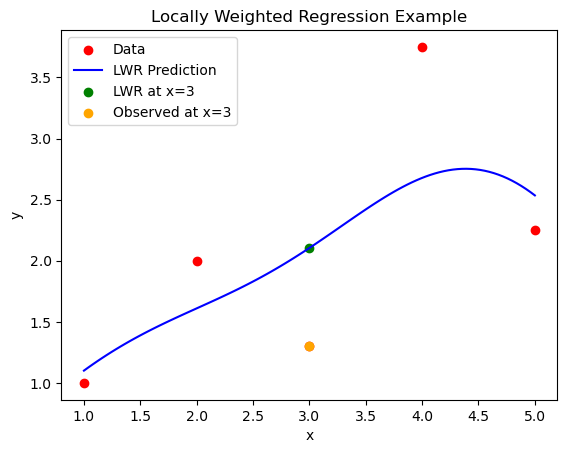

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array([1,2,3,4,5])
y=np.array([1,2,1.3,3.75,2.25])


def  gaussian_weights(x_query,X,tau):
    return np.exp(-(X-x_query)**2/(2*tau**2))

def locally_weighted_regression(x_query,X,y,tau):
    weights = gaussian_weights(x_query,X,tau)
    
    X_design = np.vstack([np.ones_like(X),X]).T
    
    W=np.diag(weights)
    
    theta=np.linalg.pinv(X_design.T @ W @ X_design) @(X_design.T@ W @y)
    
    x_query_design =np.array([1,x_query])
    y_pred = x_query_design @theta
    return y_pred,theta

tau=1.0

#Predict at x=3

x_query=3
y_pred, theta=locally_weighted_regression(x_query,X,y,tau)

print(f"Observed y at x=3: {y[X==3][0]}")
print(f"LWR Predicted y at x=3: {y_pred:.3f}")
print(f"Locally weighted regression coefficients: Intercept={theta[0]:.3f}, Slope={theta[1]:.3f}")

#plotting 
x_test =np.linspace(1,5,100)
y_test =[locally_weighted_regression(x0,X,y,tau)[0] for x0 in x_test]

plt.scatter(X,y,color='red',label='Data')
plt.plot(x_test,y_test,color='blue',label='LWR Prediction')
plt.scatter([x_query],[y_pred],color='green',label=f'LWR at x={x_query}')
plt.scatter([x_query],[y[X==x_query][0]],color='orange',label=f'Observed at x={x_query}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Locally Weighted Regression Example')
plt.show()